# Day 1: SONAR Sweep
https://adventofcode.com/2021/day/1

### Puzzle 1
Given a list of SONAR bathymetry measurements, where each subsequent number is the depth at a point further from the submarine, how many times does the depth increase from one point to the next. 'day1_puz1.txt' has a list of depths copied from project file on adventofcode.com

In [49]:
# read in the data and convert to a numpy array
import numpy as np
with open('data/day_1.txt') as f:
    btyfile = f.read().splitlines()
depths = np.asarray(btyfile, dtype=int)

# define counting function
count_increase = lambda z : (np.diff(z) > 0).sum()

In [50]:
# get difference between adjacent values
dz = np.diff(depths)
# count how many are positive (increasing in depth)
# n_depth_increase = (dz > 0).sum()
count_increase(dz)
print(f"Depth increased {n_depth_increase} times.")

Depth increased 1521 times.


### Puzzle 2
Using differences was too noisy, try comparing a 3-element sliding sum of values. 

In [51]:
# convolve the depths with a 3-element boxcar window
# 'valid' mode only returns values where the both windows were complete
z_smooth = np.convolve(depths, np.ones(3), mode='valid')
n_depth_increase_smooth = count_increase(z_smooth)
# dz_smooth = np.diff(z_smooth)
# # count number of positives
# n_depth_increase_smooth = (dz_smooth > 0).sum()

print(f"Depth increased {n_depth_increase_smooth} times.")
if n_depth_increase_smooth == dz_smooth.size:
    print(f"Depth is always increasing")

Depth increased 1543 times.


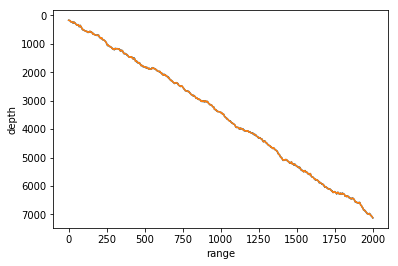

In [47]:
# plot the results
r = range(len(depths));
r_smooth = np.arange(len(depths)-2) + 1
z = depths;
z_smooth = dz_smooth / 3
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
ax.plot(r, z)
ax.plot(r_smooth, z_smooth)
ax.set_xlabel('range')
ax.set_ylabel('depth')
ax.invert_yaxis()
plt.show()